# **Experiment Notebook 4**

## Context

### 0. Import Packages

In [46]:
!pip install imblearn


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [47]:
! pip install -r https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/requirements.txt


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [48]:
import pandas as pd
import numpy as np
import altair as alt
from collections import Counter
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

### 1.   Load Dataset

In [49]:
file_url = 'https://drive.usercontent.google.com/download?id=1I9YA9aI-Cnc_IsGjyKfD_PldX5nVMmR6&export=download&authuser=0'

In [50]:
df = pd.read_csv(file_url)
df

ID  Target     age_band  gender car_model   car_segment  \
0            1       0  3. 35 to 44    Male   model_1           LCV   
1            2       0          NaN     NaN   model_2  Small/Medium   
2            3       0          NaN    Male   model_3     Large/SUV   
3            5       0          NaN     NaN   model_3     Large/SUV   
4            6       0          NaN  Female   model_2  Small/Medium   
...        ...     ...          ...     ...       ...           ...   
131332  154134       1          NaN     NaN   model_3     Large/SUV   
131333  154135       1          NaN     NaN   model_3     Large/SUV   
131334  154137       1          NaN     NaN   model_5     Large/SUV   
131335  154138       1          NaN     NaN   model_5     Large/SUV   
131336  154139       1          NaN     NaN   model_1           LCV   

        age_of_vehicle_years  sched_serv_warr  non_sched_serv_warr  \
0                          9                2                   10   
1                          6               10                    3   
2                          9               10                    9   
3                          5                8                    5   
4                          8                9                    4   
...                      ...              ...                  ...   
131332                     7               10                   10   
131333                     4               10                   10   
131334                     4                4                    9   
131335                     2                1                   10   
131336                     6                1                    7   

        sched_serv_paid  non_sched_serv_paid  total_paid_services  \
0                     3                    7                    5   
1                    10                    4                    9   
2                    10                    9                   10   
3                     8                    4                    5   
4                    10                    7                    9   
...                 ...                  ...                  ...   
131332                9                   10                   10   
131333               10                   10                   10   
131334                5                    4                    3   
131335                1                   10                    9   
131336                1                   10                   10   

        total_services  mth_since_last_serv  annualised_mileage  \
0                    6                    9                   8   
1                   10                    6                  10   
2                   10                    7                  10   
3                    6                    4                  10   
4                    8                    5                   4   
...                ...                  ...                 ...   
131332              10                    3                   6   
131333              10                    2                   3   
131334               8                    4                   7   
131335               8                    3                   6   
131336               5                    3                   4   

        num_dealers_visited  num_serv_dealer_purchased  
0                        10                          4  
1                         7                         10  
2                         6                         10  
3                         9                          7  
4                         4                          9  
...                     ...                        ...  
131332                   10                         10  
131333                   10                         10  
131334                   10                         10  
131335                    7                         10  
131336                    9                         10  


### 2. Explore Dataset

In [51]:
df.shape

(131337, 17)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         131337 non-null  int64 
 1   Target                     131337 non-null  int64 
 2   age_band                   18962 non-null   object
 3   gender                     62029 non-null   object
 4   car_model                  131337 non-null  object
 5   car_segment                131337 non-null  object
 6   age_of_vehicle_years       131337 non-null  int64 
 7   sched_serv_warr            131337 non-null  int64 
 8   non_sched_serv_warr        131337 non-null  int64 
 9   sched_serv_paid            131337 non-null  int64 
 10  non_sched_serv_paid        131337 non-null  int64 
 11  total_paid_services        131337 non-null  int64 
 12  total_services             131337 non-null  int64 
 13  mth_since_last_serv        131337 non-null  

In [53]:
df.duplicated().values.any()

False

In [54]:
df.nunique()

ID                           131337
Target                            2
age_band                          7
gender                            2
car_model                        19
car_segment                       4
age_of_vehicle_years             10
sched_serv_warr                  10
non_sched_serv_warr              10
sched_serv_paid                  10
non_sched_serv_paid              10
total_paid_services              10
total_services                   10
mth_since_last_serv              10
annualised_mileage               10
num_dealers_visited              10
num_serv_dealer_purchased        10
dtype: int64

### 3. Explore Target variable

In [55]:
target =  df['Target']

In [56]:
df_features = df.drop(['Target'], axis = 1)
df_features

ID     age_band  gender car_model   car_segment  \
0            1  3. 35 to 44    Male   model_1           LCV   
1            2          NaN     NaN   model_2  Small/Medium   
2            3          NaN    Male   model_3     Large/SUV   
3            5          NaN     NaN   model_3     Large/SUV   
4            6          NaN  Female   model_2  Small/Medium   
...        ...          ...     ...       ...           ...   
131332  154134          NaN     NaN   model_3     Large/SUV   
131333  154135          NaN     NaN   model_3     Large/SUV   
131334  154137          NaN     NaN   model_5     Large/SUV   
131335  154138          NaN     NaN   model_5     Large/SUV   
131336  154139          NaN     NaN   model_1           LCV   

        age_of_vehicle_years  sched_serv_warr  non_sched_serv_warr  \
0                          9                2                   10   
1                          6               10                    3   
2                          9               10                    9   
3                          5                8                    5   
4                          8                9                    4   
...                      ...              ...                  ...   
131332                     7               10                   10   
131333                     4               10                   10   
131334                     4                4                    9   
131335                     2                1                   10   
131336                     6                1                    7   

        sched_serv_paid  non_sched_serv_paid  total_paid_services  \
0                     3                    7                    5   
1                    10                    4                    9   
2                    10                    9                   10   
3                     8                    4                    5   
4                    10                    7                    9   
...                 ...                  ...                  ...   
131332                9                   10                   10   
131333               10                   10                   10   
131334                5                    4                    3   
131335                1                   10                    9   
131336                1                   10                   10   

        total_services  mth_since_last_serv  annualised_mileage  \
0                    6                    9                   8   
1                   10                    6                  10   
2                   10                    7                  10   
3                    6                    4                  10   
4                    8                    5                   4   
...                ...                  ...                 ...   
131332              10                    3                   6   
131333              10                    2                   3   
131334               8                    4                   7   
131335               8                    3                   6   
131336               5                    3                   4   

        num_dealers_visited  num_serv_dealer_purchased  
0                        10                          4  
1                         7                         10  
2                         6                         10  
3                         9                          7  
4                         4                          9  
...                     ...                        ...  
131332                   10                         10  
131333                   10                         10  
131334                   10                         10  
131335                    7                         10  
131336                    9                         10  

[131337 rows x 16 columns]

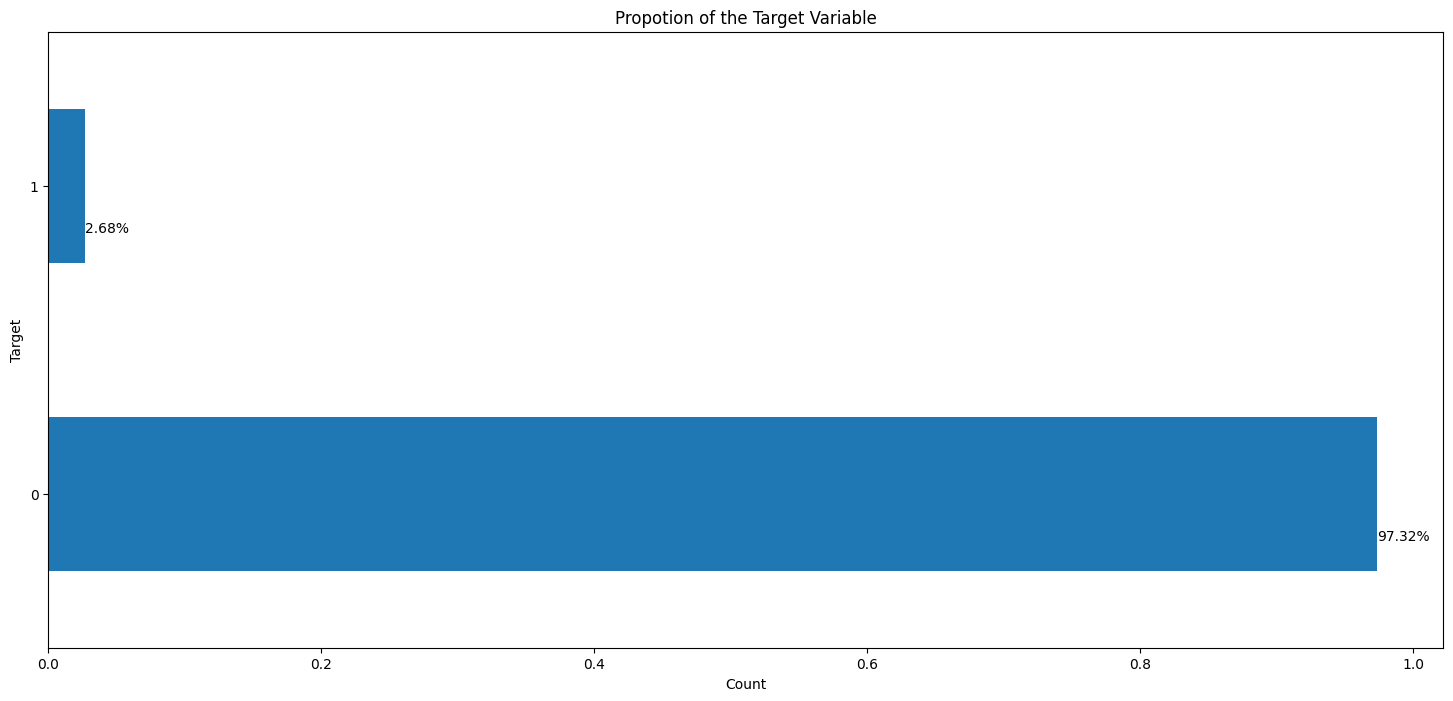

Target
0    97.31911
1     2.68089
Name: proportion, dtype: float64


Target
0    127816
1      3521
Name: count, dtype: int64

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (18,8))
ax = df["Target"].value_counts(normalize=True).plot(kind = "barh")
plt.xlabel("Count")
plt.ylabel("Target")
plt.title("Propotion of the Target Variable")

for p in ax.patches:
    percentage = '{:.2f}%'.format(p.get_width() * 100)
    ax.annotate(percentage, (p.get_x() + p.get_width(), p.get_y() + 0.1))

plt.show()

class_percentages = df["Target"].value_counts(normalize=True) * 100
print(class_percentages)

df["Target"].value_counts()

### 4. Data Exploration and Preparation

In [58]:
df['gender'].replace({'Female':0, 'Male':1}, inplace = True)

In [59]:
male_prob = df['gender'].value_counts(normalize=True)[1]
male_prob

0.5815344435667188

In [60]:
df['gender'] = df['gender'].apply(lambda x: np.random.choice([1, 0], p=[male_prob, 1-male_prob]) if pd.isnull(x) else x)

In [61]:
df = df.drop(['age_band'], axis = 1)

In [62]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.to_list()
cat_cols

['car_model', 'car_segment']

In [63]:
df = pd.get_dummies(data = df, columns = ['car_segment'], dtype = int)
df.head()

ID  Target  gender car_model  age_of_vehicle_years  sched_serv_warr  \
0   1       0     1.0   model_1                     9                2   
1   2       0     1.0   model_2                     6               10   
2   3       0     1.0   model_3                     9               10   
3   5       0     1.0   model_3                     5                8   
4   6       0     0.0   model_2                     8                9   

   non_sched_serv_warr  sched_serv_paid  non_sched_serv_paid  \
0                   10                3                    7   
1                    3               10                    4   
2                    9               10                    9   
3                    5                8                    4   
4                    4               10                    7   

   total_paid_services  total_services  mth_since_last_serv  \
0                    5               6                    9   
1                    9              10                    6   
2                   10              10                    7   
3                    5               6                    4   
4                    9               8                    5   

   annualised_mileage  num_dealers_visited  num_serv_dealer_purchased  \
0                   8                   10                          4   
1                  10                    7                         10   
2                  10                    6                         10   
3                  10                    9                          7   
4                   4                    4                          9   

   car_segment_LCV  car_segment_Large/SUV  car_segment_Other  \
0                1                      0                  0   
1                0                      0                  0   
2                0                      1                  0   
3                0                      1                  0   
4                0                      0                  0   

   car_segment_Small/Medium  
0                         0  
1                         1  
2                         0  
3                         0  
4                         1

In [64]:
frequency_encoding = df['car_model'].value_counts(normalize = True)
frequency_encoding

car_model
model_2     0.262614
model_5     0.187868
model_3     0.130001
model_1     0.116730
model_4     0.115390
model_7     0.062184
model_8     0.049057
model_10    0.024479
model_6     0.023383
model_9     0.007568
model_13    0.005436
model_12    0.004675
model_11    0.004660
model_15    0.002543
model_17    0.001165
model_16    0.000868
model_18    0.000769
model_14    0.000594
model_19    0.000015
Name: proportion, dtype: float64

In [65]:
df['car_model_freq'] = df['car_model'].map(frequency_encoding)
df[['car_model', 'car_model_freq']].head()

car_model  car_model_freq
0   model_1        0.116730
1   model_2        0.262614
2   model_3        0.130001
3   model_3        0.130001
4   model_2        0.262614

In [66]:
num_cols = df.select_dtypes('number').columns.to_list()
num_cols

['ID',
 'Target',
 'gender',
 'age_of_vehicle_years',
 'sched_serv_warr',
 'non_sched_serv_warr',
 'sched_serv_paid',
 'non_sched_serv_paid',
 'total_paid_services',
 'total_services',
 'mth_since_last_serv',
 'annualised_mileage',
 'num_dealers_visited',
 'num_serv_dealer_purchased',
 'car_segment_LCV',
 'car_segment_Large/SUV',
 'car_segment_Other',
 'car_segment_Small/Medium',
 'car_model_freq']

In [67]:
df_cor_matrix = df[num_cols].corr()
df_cor_matrix

ID    Target    gender  age_of_vehicle_years  \
ID                         1.000000  0.279716  0.006475             -0.034468   
Target                     0.279716  1.000000  0.018233             -0.124091   
gender                     0.006475  0.018233  1.000000             -0.005246   
age_of_vehicle_years      -0.034468 -0.124091 -0.005246              1.000000   
sched_serv_warr           -0.051190 -0.177424  0.001389              0.431484   
non_sched_serv_warr       -0.023993 -0.081328  0.001282              0.427567   
sched_serv_paid           -0.051035 -0.179040  0.004132              0.533914   
non_sched_serv_paid       -0.012360 -0.028396  0.020665              0.330540   
total_paid_services       -0.027313 -0.084429  0.022595              0.472669   
total_services            -0.046717 -0.159905  0.003468              0.505577   
mth_since_last_serv       -0.039836 -0.141695 -0.017206              0.622472   
annualised_mileage        -0.022544 -0.073055  0.008711              0.432593   
num_dealers_visited       -0.013416 -0.047244 -0.002457              0.367122   
num_serv_dealer_purchased -0.016724 -0.052618 -0.009432              0.318558   
car_segment_LCV           -0.000118  0.010310  0.126544             -0.055091   
car_segment_Large/SUV      0.004839  0.014811  0.044931             -0.053779   
car_segment_Other         -0.002728 -0.001245 -0.004913             -0.018175   
car_segment_Small/Medium  -0.004594 -0.022815 -0.144597              0.097789   
car_model_freq            -0.004306 -0.011897 -0.080588              0.061210   

                           sched_serv_warr  non_sched_serv_warr  \
ID                               -0.051190            -0.023993   
Target                           -0.177424            -0.081328   
gender                            0.001389             0.001282   
age_of_vehicle_years              0.431484             0.427567   
sched_serv_warr                   1.000000             0.452472   
non_sched_serv_warr               0.452472             1.000000   
sched_serv_paid                   0.862843             0.461550   
non_sched_serv_paid               0.385451             0.778126   
total_paid_services               0.647962             0.711511   
total_services                    0.824917             0.806163   
mth_since_last_serv               0.274362             0.328036   
annualised_mileage                0.745811             0.585439   
num_dealers_visited               0.400348             0.460416   
num_serv_dealer_purchased         0.595877             0.556104   
car_segment_LCV                  -0.031230             0.007975   
car_segment_Large/SUV             0.001040             0.023439   
car_segment_Other                -0.025914            -0.022775   
car_segment_Small/Medium          0.024801            -0.028614   
car_model_freq                    0.082789             0.056011   

                           sched_serv_paid  non_sched_serv_paid  \
ID                               -0.051035            -0.012360   
Target                           -0.179040            -0.028396   
gender                            0.004132             0.020665   
age_of_vehicle_years              0.533914             0.330540   
sched_serv_warr                   0.862843             0.385451   
non_sched_serv_warr               0.461550             0.778126   
sched_serv_paid                   1.000000             0.421448   
non_sched_serv_paid               0.421448             1.000000   
total_paid_services               0.734002             0.858045   
total_services                    0.768570             0.653475   
mth_since_last_serv               0.340992             0.291647   
annualised_mileage                0.713790             0.505798   
num_dealers_visited               0.421232             0.418157   
num_serv_dealer_purchased         0.552438             0.480041   
car_segment_LCV                  -0.020923             0.107797   

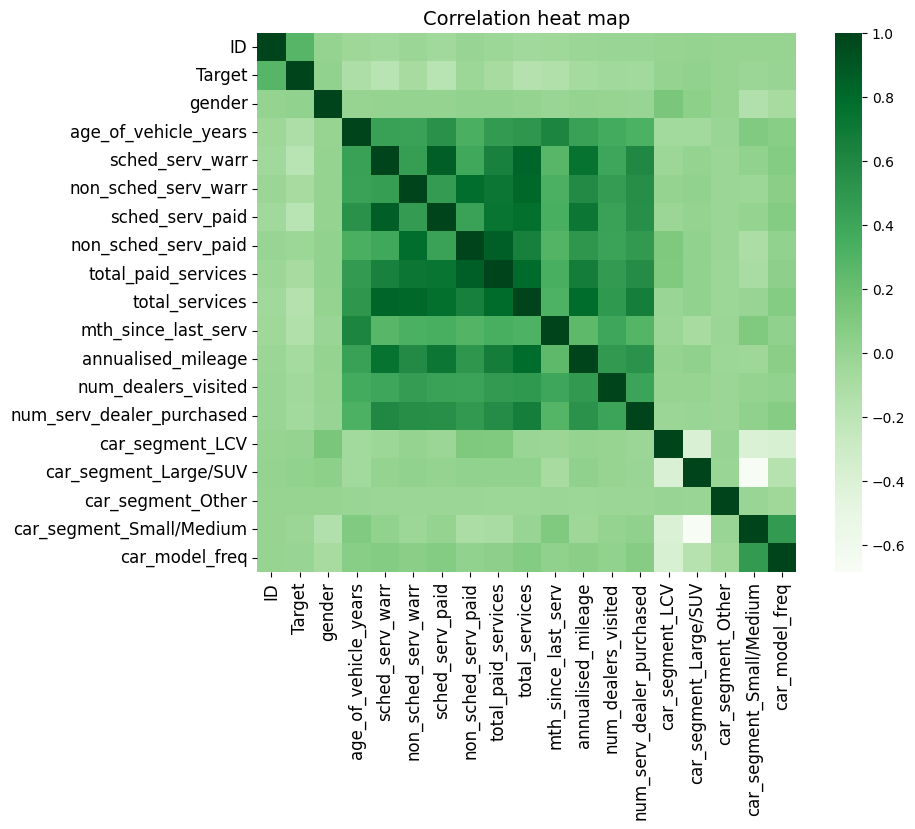

In [68]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
_ = sns.heatmap(df_cor_matrix, square=True, cmap='Greens')
_ = plt.title('Correlation heat map', fontsize=14)
_ = plt.xticks(fontsize=12)
_ = plt.yticks(fontsize=12)

<Axes: >

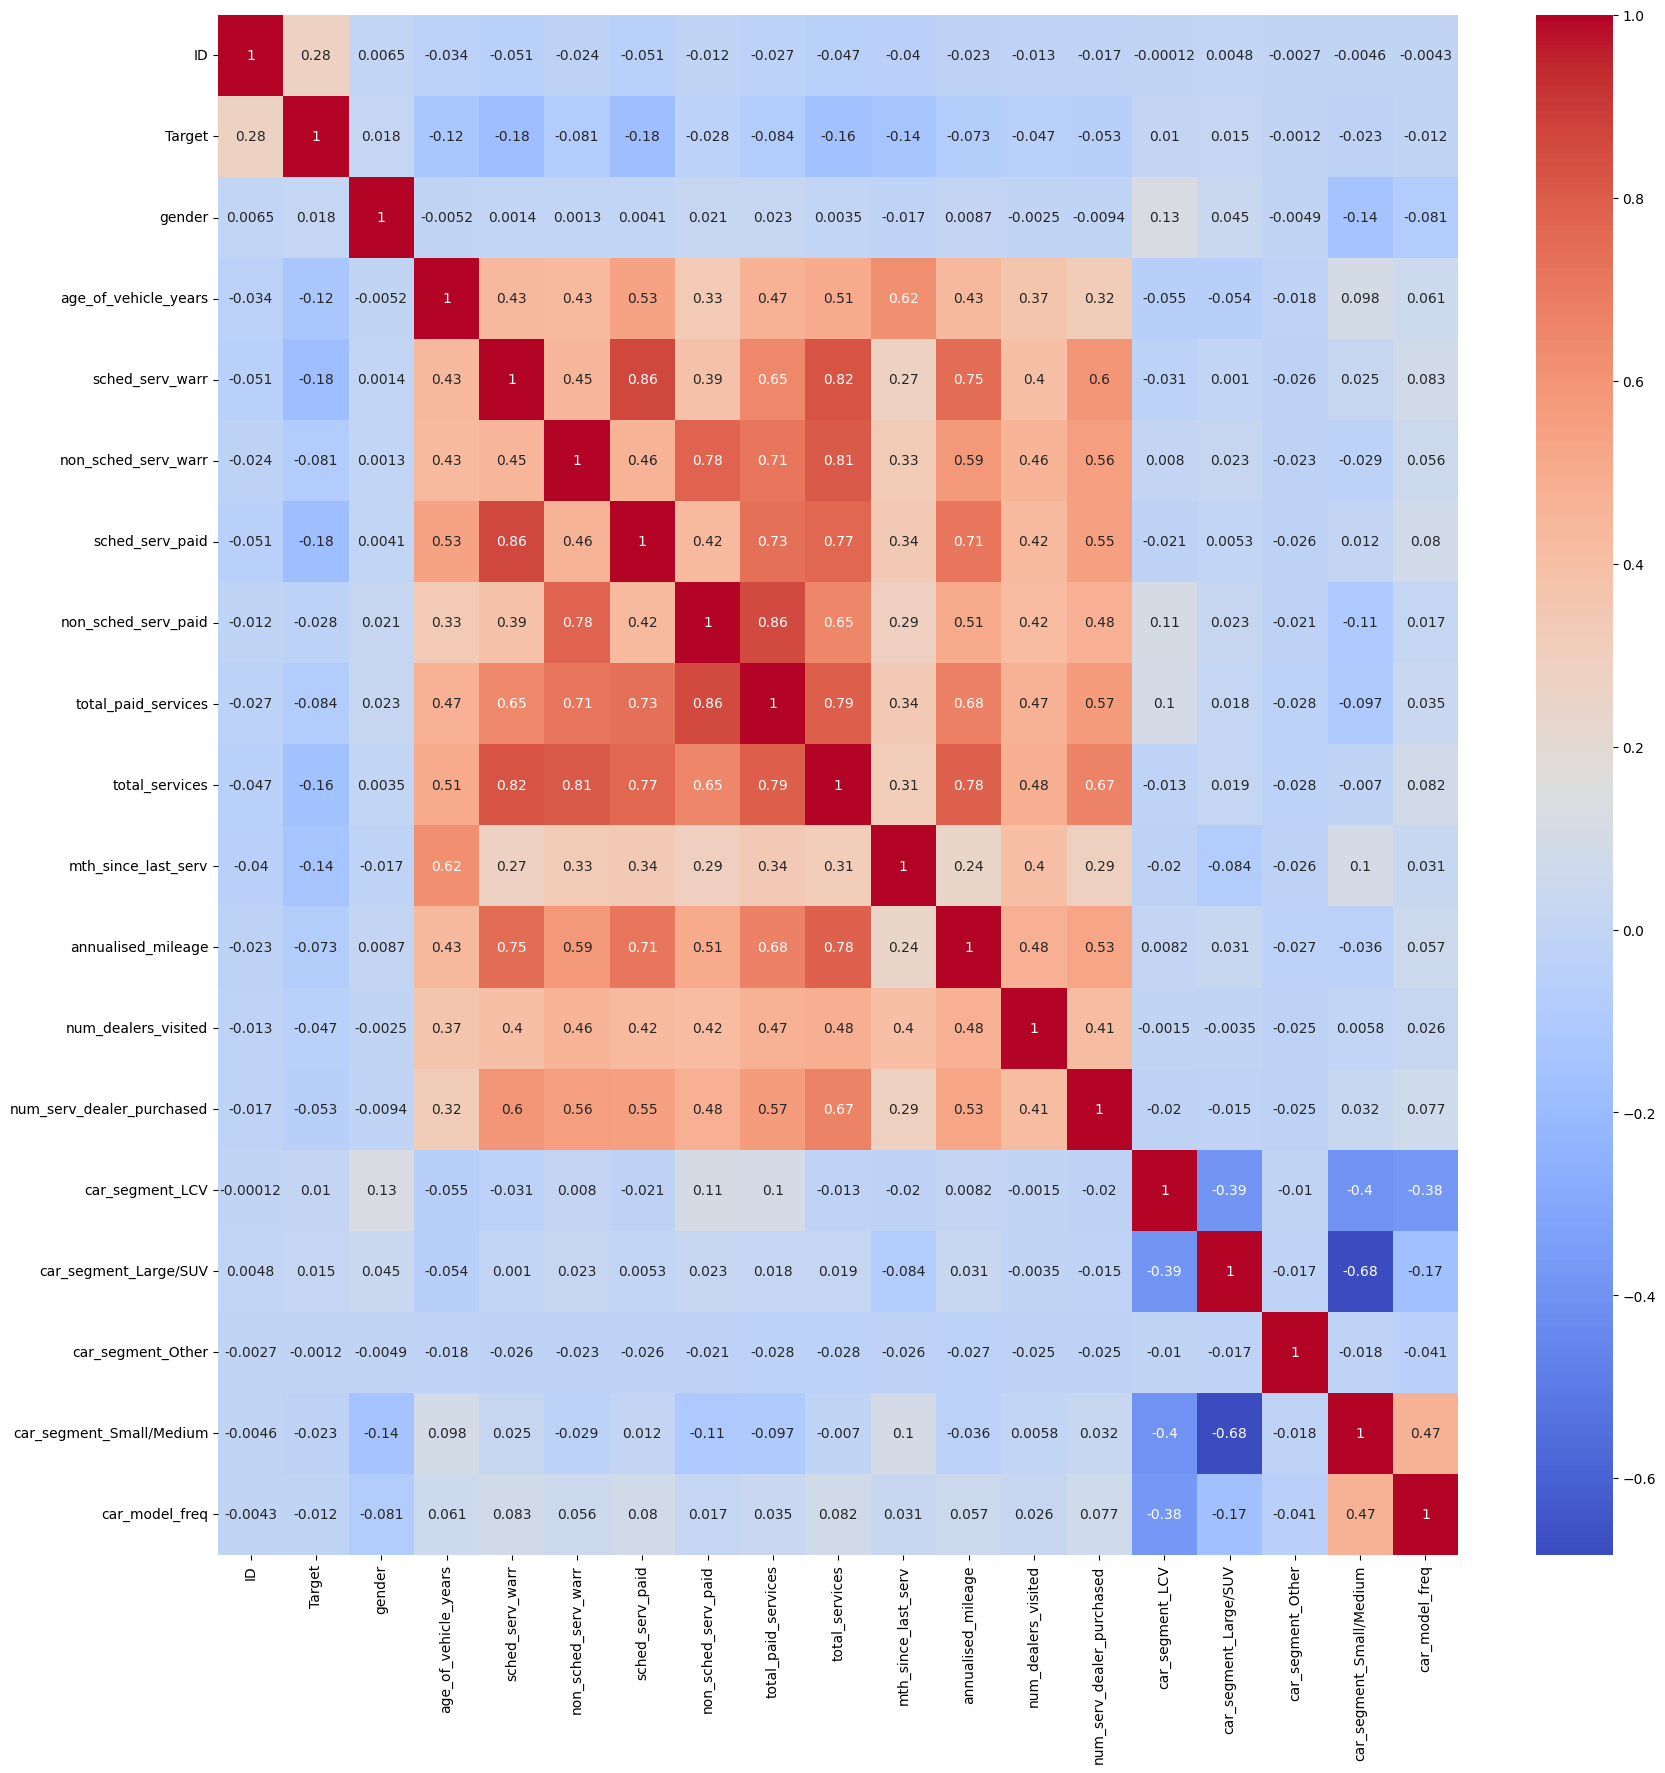

In [69]:
plt.figure(figsize=(20,20))
sns.heatmap(df_cor_matrix, cmap = "coolwarm", annot=True)

In [70]:
cor_with_label = df_cor_matrix['Target']
cor_sorted = cor_with_label.sort_values(ascending=False)
cor_sorted

Target                       1.000000
ID                           0.279716
gender                       0.018233
car_segment_Large/SUV        0.014811
car_segment_LCV              0.010310
car_segment_Other           -0.001245
car_model_freq              -0.011897
car_segment_Small/Medium    -0.022815
non_sched_serv_paid         -0.028396
num_dealers_visited         -0.047244
num_serv_dealer_purchased   -0.052618
annualised_mileage          -0.073055
non_sched_serv_warr         -0.081328
total_paid_services         -0.084429
age_of_vehicle_years        -0.124091
mth_since_last_serv         -0.141695
total_services              -0.159905
sched_serv_warr             -0.177424
sched_serv_paid             -0.179040
Name: Target, dtype: float64

In [71]:
df.columns

Index(['ID', 'Target', 'gender', 'car_model', 'age_of_vehicle_years',
       'sched_serv_warr', 'non_sched_serv_warr', 'sched_serv_paid',
       'non_sched_serv_paid', 'total_paid_services', 'total_services',
       'mth_since_last_serv', 'annualised_mileage', 'num_dealers_visited',
       'num_serv_dealer_purchased', 'car_segment_LCV', 'car_segment_Large/SUV',
       'car_segment_Other', 'car_segment_Small/Medium', 'car_model_freq'],
      dtype='object')

In [72]:
choosen_features = ['gender', 'age_of_vehicle_years',
       'sched_serv_warr', 'non_sched_serv_warr', 'sched_serv_paid',
       'non_sched_serv_paid', 'total_paid_services', 'total_services',
       'mth_since_last_serv', 'annualised_mileage', 'num_dealers_visited',
       'num_serv_dealer_purchased', 'car_segment_LCV', 'car_segment_Large/SUV',
       'car_segment_Other', 'car_segment_Small/Medium', 'car_model_freq']

### 5. Feature Scaling

In [73]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

In [74]:
df[choosen_features] = standard_scaler.fit_transform(df[choosen_features])
df[choosen_features].head()

gender  age_of_vehicle_years  sched_serv_warr  non_sched_serv_warr  \
0  0.849494              1.233424        -1.196990             1.577161   
1  0.849494              0.178307         1.576630            -0.861308   
2  0.849494              1.233424         1.576630             1.228808   
3  0.849494             -0.173398         0.883225            -0.164603   
4 -1.177172              0.881718         1.229927            -0.512955   

   sched_serv_paid  non_sched_serv_paid  total_paid_services  total_services  \
0        -0.849566             0.522096            -0.167231        0.189514   
1         1.575502            -0.520046             1.221466        1.580359   
2         1.575502             1.216857             1.568640        1.580359   
3         0.882625            -0.520046            -0.167231        0.189514   
4         1.575502             0.522096             1.221466        0.884936   

   mth_since_last_serv  annualised_mileage  num_dealers_visited  \
0             1.234443            0.874698             1.569321   
1             0.185399            1.575252             0.526482   
2             0.535080            1.575252             0.178868   
3            -0.513964            1.575252             1.221708   
4            -0.164283           -0.526409            -0.516358   

   num_serv_dealer_purchased  car_segment_LCV  car_segment_Large/SUV  \
0                  -0.516398         2.082691              -0.811135   
1                   1.576007        -0.480148              -0.811135   
2                   1.576007        -0.480148               1.232841   
3                   0.529805        -0.480148               1.232841   
4                   1.227273        -0.480148              -0.811135   

   car_segment_Other  car_segment_Small/Medium  car_model_freq  
0          -0.021019                 -0.842896       -0.493523  
1          -0.021019                  1.186386        1.355834  
2          -0.021019                 -0.842896       -0.325285  
3          -0.021019                 -0.842896       -0.325285  
4          -0.021019                  1.186386        1.355834

In [75]:
X = df[choosen_features]
y = target

### 6. Split Dataset

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42)

In [77]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(91935, 17) (91935,)
(19701, 17) (19701,)
(19701, 17) (19701,)


In [78]:
from imblearn.over_sampling import SMOTE

In [79]:
smote = SMOTE(random_state=42)
X_train_smt, y_train_smt = smote.fit_resample(X_train, y_train)

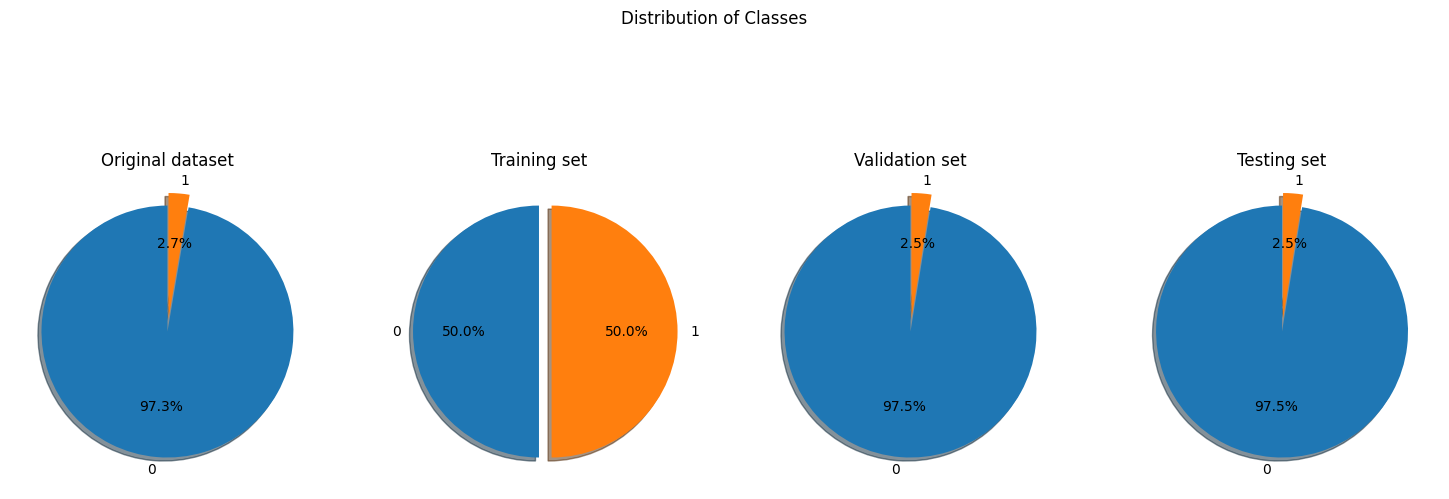

In [80]:
ori_dist = dict(Counter(y))
train_dist = dict(Counter(y_train_smt))
valid_dist = dict(Counter(y_valid))
test_dist = dict(Counter(y_test))

explode = (0, 0.1)

fig, ax = plt.subplots(1, 4, figsize = (15, 15))
fig.suptitle ('Distribution of Classes', y=0.71)
fig.tight_layout(pad = 1)
ax[0].pie(ori_dist.values(), explode = explode, labels = ori_dist.keys(), autopct = '%1.1f%%', shadow = True, startangle = 90)
ax[0].set_title ('Original dataset')
ax[1].pie(train_dist.values(), explode=explode, labels=train_dist.keys(), autopct = '%1.1f%%', shadow = True, startangle = 90)
ax[1].set_title ('Training set')
ax[2].pie(test_dist.values(), explode=explode, labels=valid_dist.keys(), autopct='%1.1f%%',shadow=True, startangle=90)
ax[2].set_title ('Validation set')
ax[3].pie(test_dist.values(), explode=explode, labels=test_dist.keys(), autopct='%1.1f%%',shadow=True, startangle=90)
ax[3].set_title ('Testing set')

plt.show()

In [81]:
counter = Counter(y_train)
print('Before',counter)

counter = Counter(y_train_smt)
print('After',counter)

Before Counter({0: 89444, 1: 2491})
After Counter({0: 89444, 1: 89444})


### 7. Random Forest Model

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import  model_selection
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, roc_curve, fbeta_score, make_scorer

In [83]:
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state=42)

In [84]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [85]:
rf_y_pred = rf_classifier.predict(X_valid)

In [86]:
rf = round(fbeta_score(y_valid, rf_y_pred, beta = 3)*100, 3)
print(rf)

75.746


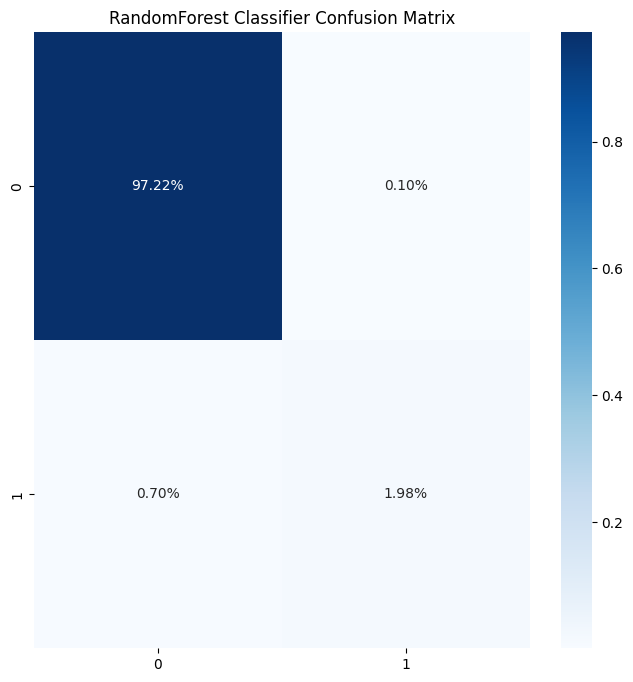

In [87]:
plt.figure(figsize = (8, 8))
cm1 = confusion_matrix(y_valid, rf_y_pred)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Blues')
plt.title("RandomForest Classifier Confusion Matrix", fontsize = 12)
plt.show()

In [88]:
print(classification_report(y_valid,rf_y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19173
           1       0.95      0.74      0.83       528

    accuracy                           0.99     19701
   macro avg       0.97      0.87      0.91     19701
weighted avg       0.99      0.99      0.99     19701



### **8. Random Forest Tuning**

In [89]:
f3_scorer = make_scorer(fbeta_score, beta=3)

In [90]:
rf_hyperparameters_grid1 = {
    "n_estimators": [50, 100, 500, 1000, 2000],
    "min_samples_leaf": [1, 2, 4],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "bootstrap": [True, False]
}
    
model_rf = RandomForestClassifier()
rf_grid_search1 = GridSearchCV(
    model_rf, 
    rf_hyperparameters_grid1, 
    cv = 5, scoring = f3_scorer, verbose = 2, n_jobs = -1)
rf_grid_search1.fit(X_train, y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   9.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time= 5.2min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time= 1.2min
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time= 5.0min


/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   2.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   7.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time= 1.1min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time= 2.6min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time= 2.4min
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  15.9s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time= 5.0min


/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  11.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time= 2.8min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time= 1.1min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time= 2.3min
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time= 5.4min


/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time= 1.4min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   7.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  15.6s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time= 2.2min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   8.7s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time= 1.2min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time= 1.3min
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   7.8s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   5.6s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   5.9s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time= 1.0min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=2000; total time= 4.2min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time= 2.4min
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time= 1.2min
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time= 4.6min
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  18.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4,

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=  58.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   5.9s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=  57.8s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   6.6s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time= 1.3min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   9.0s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  18.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time= 5.8min
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_sa

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time= 4.5min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   7.4s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  13.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time= 4.7min
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time= 2.5min
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   7.3s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  14.1s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time= 2.6min
[CV] END bootstrap=False, max_depth=20, min_samples_leaf

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   7.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  13.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time= 4.8min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time= 5.2min
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time= 2.4min
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time= 2.6min
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  18.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time= 6.2min


/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   5.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time= 4.6min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time= 4.9min
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   7.9s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=  15.9s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   8.1s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  15.2s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time= 4.8min
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, 

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time= 1.1min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=  58.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  14.7s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  15.0s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time= 2.1min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time= 5.2min
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=2000; total time= 4.9min
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  10.7s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, 

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time= 2.1min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  13.5s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   6.7s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time= 1.5min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time= 5.1min
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time= 5.1min
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time= 2.5min
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  16.9s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  16.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   8.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  15.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time= 1.2min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   8.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  14.7s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   7.6s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samp

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 2.0min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time= 5.3min
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   8.2s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  14.9s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time= 4.6min
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time= 2.4min
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time= 2.3min
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time= 6.1min


/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   7.3s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  14.6s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time= 5.0min
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time= 5.8min


/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   3.9s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  12.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time= 4.5min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   6.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  12.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time= 5.0min
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   6.3s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time= 1.1min
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, mi

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time= 1.1min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time= 1.0min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time= 1.4min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   8.6s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time= 1.3min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time= 2.7min
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   9.4s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time= 1.5min
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_s

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time= 4.8min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  15.1s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   7.7s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=  15.6s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   8.0s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  15.8s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time= 2.6min
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=2, min

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   8.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time= 2.0min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  12.7s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   6.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  13.0s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time= 2.2min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   6.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  15.8s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_s

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=  59.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=  11.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time= 1.9min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time= 4.9min
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   7.1s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time= 1.1min
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  14.3s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time= 4.1min
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, m

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   7.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time= 2.3min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  14.7s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time= 4.4min
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time= 4.5min
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  17.6s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   8.7s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  17.3s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   8.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time= 2.2min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time= 4.2min
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   6.3s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   6.5s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  13.5s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time= 2.7min
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=  17.3s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  11.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time= 1.3min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time= 1.2min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   7.4s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time= 1.3min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time= 2.9min
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time= 5.5min
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time= 1.2min
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   6.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  15.6s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time= 4.4min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   6.4s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  12.5s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time= 4.7min
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=  17.6s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   8.9s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=  59.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   6.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time= 1.9min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time= 1.1min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time= 1.1min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time= 1.0min
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time= 1.1min
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time= 2.1min
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, mi

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  16.0s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time= 5.0min


/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=  59.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   7.6s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=  13.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=2000; total time= 4.4min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  14.6s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time= 2.5min
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time= 5.0min
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   8.3s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, 

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  56.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time= 5.2min
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   7.0s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  13.1s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 2.6min
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time= 4.7min
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time= 2.6min
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time= 6.0min
[CV] END bootstrap=False, max_depth=30, min_samples_leaf

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time= 2.1min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   6.6s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time= 1.4min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   6.5s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  13.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time= 5.3min
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   6.9s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   7.5s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_sam

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

[CV] END bootstrap=False, max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   7.9s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time= 1.3min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.6s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   6.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  13.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  12.9s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=  59.6s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time= 1.0min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 500, 1000, 2000]},
             scoring=make_scorer(fbeta_score, beta=3), verbose=2)

In [91]:
rf_grid_search1.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 2000}

In [92]:
rf_grid_search1.best_score_

0.7951420304326082

### Predicting the Target variable in the Testing Set

In [93]:
y_test_pred = rf_grid_search1.predict(X_test)

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   5.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  12.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   8.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time= 1.3min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time= 2.1min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time= 5.3min
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   8.9s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_

In [94]:
rf_final = round(fbeta_score(y_valid, y_test_pred, beta = 3)*100, 3)
print(rf)

75.746
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=  56.9s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time= 4.9min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time= 1.2min
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time= 2.5min
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time= 2.3min
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time= 4.9min
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time= 1.4min
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  16.2s
[CV] END bootstrap=False, max_depth=20, min_samp